In [95]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas_ta as ta
import sys

from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate

In [174]:
# fetching dataset
df = pd.read_csv("MCD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1966-07-05,0.0,0.273663,0.267490,0.269547,0.121445,388800
1,1966-07-06,0.0,0.283951,0.267490,0.283951,0.127935,692550
2,1966-07-07,0.0,0.291152,0.271605,0.273663,0.123300,1858950
3,1966-07-08,0.0,0.276749,0.267490,0.276749,0.124690,1239300
4,1966-07-11,0.0,0.283951,0.272634,0.275720,0.124227,656100


In [175]:
# we add features
df['RSI'] = ta.rsi(df.Close, length = 15)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI
0,1966-07-05,0.0,0.273663,0.267490,0.269547,0.121445,388800,NaN
1,1966-07-06,0.0,0.283951,0.267490,0.283951,0.127935,692550,NaN
2,1966-07-07,0.0,0.291152,0.271605,0.273663,0.123300,1858950,NaN
3,1966-07-08,0.0,0.276749,0.267490,0.276749,0.124690,1239300,NaN
4,1966-07-11,0.0,0.283951,0.272634,0.275720,0.124227,656100,NaN


In [176]:
df['AD'] = ta.ad(df.High, df.Low, df.Close, df.Volume)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,AD
0,1966-07-05,0.0,0.273663,0.267490,0.269547,0.121445,388800,NaN,-129683.978617
1,1966-07-06,0.0,0.283951,0.267490,0.283951,0.127935,692550,NaN,562866.021383
2,1966-07-07,0.0,0.291152,0.271605,0.273663,0.123300,1858950,NaN,-904645.998364
3,1966-07-08,0.0,0.276749,0.267490,0.276749,0.124690,1239300,NaN,334654.001636
4,1966-07-11,0.0,0.283951,0.272634,0.275720,0.124227,656100,NaN,36374.024610


In [177]:
df['OBV'] = ta.obv(df.Close, df.Volume)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,AD,OBV
0,1966-07-05,0.0,0.273663,0.267490,0.269547,0.121445,388800,NaN,-129683.978617,388800.0
1,1966-07-06,0.0,0.283951,0.267490,0.283951,0.127935,692550,NaN,562866.021383,1081350.0
2,1966-07-07,0.0,0.291152,0.271605,0.273663,0.123300,1858950,NaN,-904645.998364,-777600.0
3,1966-07-08,0.0,0.276749,0.267490,0.276749,0.124690,1239300,NaN,334654.001636,461700.0
4,1966-07-11,0.0,0.283951,0.272634,0.275720,0.124227,656100,NaN,36374.024610,-194400.0


In [178]:
aroon = ta.aroon(df.High, df.Low)
df['AROOND_14'] = aroon['AROOND_14']
df['AROONU_14'] = aroon['AROONU_14']
df['AROONOSC_14'] = aroon['AROONOSC_14']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,AD,OBV,AROOND_14,AROONU_14,AROONOSC_14
0,1966-07-05,0.0,0.273663,0.267490,0.269547,0.121445,388800,NaN,-129683.978617,388800.0,NaN,NaN,NaN
1,1966-07-06,0.0,0.283951,0.267490,0.283951,0.127935,692550,NaN,562866.021383,1081350.0,NaN,NaN,NaN
2,1966-07-07,0.0,0.291152,0.271605,0.273663,0.123300,1858950,NaN,-904645.998364,-777600.0,NaN,NaN,NaN
3,1966-07-08,0.0,0.276749,0.267490,0.276749,0.124690,1239300,NaN,334654.001636,461700.0,NaN,NaN,NaN
4,1966-07-11,0.0,0.283951,0.272634,0.275720,0.124227,656100,NaN,36374.024610,-194400.0,NaN,NaN,NaN


In [122]:
macd = ta.macd(df.Close)
df['MACD_12_26_9'] = macd['MACD_12_26_9']
df['MACDh_12_26_9'] = macd['MACDh_12_26_9']
df['MACDs_12_26_9'] = macd['MACDs_12_26_9']
df.head()

C:\Users\jangi\AppData\Local\Temp\ipykernel_29896\436762214.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  macd = ta.macd(df.Close)


,Date,Open,High,Low,Close,Adj Close,Volume,RSI,AD,OBV,AROOND_14,AROONU_14,AROONOSC_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,1966-07-05,0.0,0.273663,0.267490,0.269547,0.121445,388800,NaN,-129683.978617,388800.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1966-07-06,0.0,0.283951,0.267490,0.283951,0.127935,692550,NaN,562866.021383,1081350.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1966-07-07,0.0,0.291152,0.271605,0.273663,0.123300,1858950,NaN,-904645.998364,-777600.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1966-07-08,0.0,0.276749,0.267490,0.276749,0.124690,1239300,NaN,334654.001636,461700.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1966-07-11,0.0,0.283951,0.272634,0.275720,0.124227,656100,NaN,36374.024610,-194400.0,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
df['EMAF'] = ta.ema(df.Close, length = 20)
df['EMAM'] = ta.ema(df.Close, length = 100)
df['EMAs'] = ta.ema(df.Close, length = 150)
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,AD,OBV,AROOND_14,AROONU_14,AROONOSC_14,EMAF,EMAM,EMAs
0,1966-07-05,0.000000,0.273663,0.267490,0.269547,0.121445,388800,NaN,-1.296840e+05,3.888000e+05,NaN,NaN,NaN,NaN,NaN,NaN
1,1966-07-06,0.000000,0.283951,0.267490,0.283951,0.127935,692550,NaN,5.628660e+05,1.081350e+06,NaN,NaN,NaN,NaN,NaN,NaN
2,1966-07-07,0.000000,0.291152,0.271605,0.273663,0.123300,1858950,NaN,-9.046460e+05,-7.776000e+05,NaN,NaN,NaN,NaN,NaN,NaN
3,1966-07-08,0.000000,0.276749,0.267490,0.276749,0.124690,1239300,NaN,3.346540e+05,4.617000e+05,NaN,NaN,NaN,NaN,NaN,NaN
4,1966-07-11,0.000000,0.283951,0.272634,0.275720,0.124227,656100,NaN,3.637402e+04,-1.944000e+05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14183,2022-11-07,275.070007,278.079987,275.070007,276.410004,276.410004,3029500,73.125759,1.687371e+09,2.461938e+09,0.000000,100.000000,100.000000,261.746489,253.265421,252.005705
14184,2022-11-08,276.859985,279.519989,276.500000,278.399994,278.399994,2628800,74.434501,1.688050e+09,2.464567e+09,7.142857,100.000000,92.857143,263.332537,253.763135,252.355298
14185,2022-11-09,278.510010,280.250000,277.679993,277.790009,277.790009,2610800,73.262757,1.685662e+09,2.461956e+09,0.000000,100.000000,100.000000,264.709439,254.238915,252.692182
14186,2022-11-10,281.489990,281.670013,272.579987,275.880005,275.880005,4510900,69.587658,1.684427e+09,2.457445e+09,0.000000,100.000000,100.000000,265.773303,254.667451,252.999306


In [180]:
df['TargetNextClose'] = df['Adj Close'].shift(-1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,AD,OBV,AROOND_14,AROONU_14,AROONOSC_14,EMAF,EMAM,EMAs,TargetNextClose
0,1966-07-05,0.0,0.273663,0.267490,0.269547,0.121445,388800,NaN,-129683.978617,388800.0,NaN,NaN,NaN,NaN,NaN,NaN,0.127935
1,1966-07-06,0.0,0.283951,0.267490,0.283951,0.127935,692550,NaN,562866.021383,1081350.0,NaN,NaN,NaN,NaN,NaN,NaN,0.123300
2,1966-07-07,0.0,0.291152,0.271605,0.273663,0.123300,1858950,NaN,-904645.998364,-777600.0,NaN,NaN,NaN,NaN,NaN,NaN,0.124690
3,1966-07-08,0.0,0.276749,0.267490,0.276749,0.124690,1239300,NaN,334654.001636,461700.0,NaN,NaN,NaN,NaN,NaN,NaN,0.124227
4,1966-07-11,0.0,0.283951,0.272634,0.275720,0.124227,656100,NaN,36374.024610,-194400.0,NaN,NaN,NaN,NaN,NaN,NaN,0.122373


In [181]:
train_dates = pd.to_datetime(df['Date'])
train_dates

0       1966-07-05
1       1966-07-06
2       1966-07-07
3       1966-07-08
4       1966-07-11
           ...    
14183   2022-11-07
14184   2022-11-08
14185   2022-11-09
14186   2022-11-10
14187   2022-11-11
Name: Date, Length: 14188, dtype: datetime64[ns]

In [182]:
df.dropna(inplace = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,AD,OBV,AROOND_14,AROONU_14,AROONOSC_14,EMAF,EMAM,EMAs,TargetNextClose
149,1967-02-06,0.000000,0.312757,0.299383,0.303498,0.136742,2016900,73.527807,-6.558322e+06,-3.572100e+06,85.714286,100.000000,14.285714,0.275085,0.232266,0.214733,0.138596
150,1967-02-07,0.000000,0.307613,0.300412,0.307613,0.138596,328050,74.816228,-6.230272e+06,-3.244050e+06,78.571429,92.857143,14.285714,0.278183,0.233758,0.215963,0.140450
151,1967-02-08,0.000000,0.311728,0.304527,0.311728,0.140450,947700,76.064402,-5.282572e+06,-2.296350e+06,71.428571,85.714286,14.285714,0.281377,0.235302,0.217231,0.136278
152,1967-02-09,0.000000,0.317901,0.302469,0.302469,0.136278,1445850,67.945911,-6.728422e+06,-3.742200e+06,64.285714,100.000000,35.714286,0.283386,0.236632,0.218360,0.139523
153,1967-02-10,0.000000,0.310700,0.303498,0.309671,0.139523,571050,70.564224,-6.320552e+06,-3.171150e+06,57.142857,92.857143,35.714286,0.285889,0.238078,0.219570,0.140450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,2022-11-04,275.600006,275.709991,272.130005,274.619995,274.619995,3256500,71.918904,1.687703e+09,2.458908e+09,0.000000,85.714286,85.714286,260.202961,252.797854,251.678131,276.410004
14183,2022-11-07,275.070007,278.079987,275.070007,276.410004,276.410004,3029500,73.125759,1.687371e+09,2.461938e+09,0.000000,100.000000,100.000000,261.746489,253.265421,252.005705,278.399994
14184,2022-11-08,276.859985,279.519989,276.500000,278.399994,278.399994,2628800,74.434501,1.688050e+09,2.464567e+09,7.142857,100.000000,92.857143,263.332537,253.763135,252.355298,277.790009
14185,2022-11-09,278.510010,280.250000,277.679993,277.790009,277.790009,2610800,73.262757,1.685662e+09,2.461956e+09,0.000000,100.000000,100.000000,264.709439,254.238915,252.692182,275.880005


In [183]:
df.drop(['Volume', 'Close', 'Date'], axis = 1, inplace = True)
df.head()

,Open,High,Low,Adj Close,RSI,AD,OBV,AROOND_14,AROONU_14,AROONOSC_14,EMAF,EMAM,EMAs,TargetNextClose
149,0.0,0.312757,0.299383,0.136742,73.527807,-6.558322e+06,-3572100.0,85.714286,100.000000,14.285714,0.275085,0.232266,0.214733,0.138596
150,0.0,0.307613,0.300412,0.138596,74.816228,-6.230272e+06,-3244050.0,78.571429,92.857143,14.285714,0.278183,0.233758,0.215963,0.140450
151,0.0,0.311728,0.304527,0.140450,76.064402,-5.282572e+06,-2296350.0,71.428571,85.714286,14.285714,0.281377,0.235302,0.217231,0.136278
152,0.0,0.317901,0.302469,0.136278,67.945911,-6.728422e+06,-3742200.0,64.285714,100.000000,35.714286,0.283386,0.236632,0.218360,0.139523
153,0.0,0.310700,0.303498,0.139523,70.564224,-6.320552e+06,-3171150.0,57.142857,92.857143,35.714286,0.285889,0.238078,0.219570,0.140450


In [184]:
# we apply MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df)
df_scaled

array([[0.00000000e+00, 3.25330907e-04, 3.07753021e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.47275058e-04],
       [0.00000000e+00, 3.07054050e-04, 3.11461583e-04, ...,
        5.86403776e-06, 4.86661541e-06, 1.53936877e-04],
       [0.00000000e+00, 3.21674825e-04, 3.26292229e-04, ...,
        1.19322149e-05, 9.88438403e-06, 1.38945989e-04],
       ...,
       [9.83551795e-01, 9.92360870e-01, 9.95747252e-01, ...,
        9.96445790e-01, 9.97452348e-01, 9.97808193e-01],
       [9.89413549e-01, 9.94954632e-01, 1.00000000e+00, ...,
        9.98315734e-01, 9.98785039e-01, 9.90945140e-01],
       [1.00000000e+00, 1.00000000e+00, 9.81619348e-01, ...,
        1.00000000e+00, 1.00000000e+00, 9.74811646e-01]])

In [185]:
df_scaled.shape

(14038, 14)

In [186]:
trainX = []
trainY = []

n_future = 1
n_past = 20

for i in range(n_past, len(df_scaled) - n_future +1):
    trainX.append(df_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
splitlimit = int(len(trainX) * 0.8)

X_train, X_test = trainX[:splitlimit], trainX[splitlimit:]
y_train, y_test = trainY[:splitlimit], trainY[splitlimit:]

splitlimit_validation = int(len(X_train) * 0.8)

X_train_, X_validation = X_train[:splitlimit_validation], X_train[splitlimit_validation:]
y_train_, y_validation = y_train[:splitlimit_validation], y_train[splitlimit_validation:]
    
lstm_input = Input(shape = (n_past, X_train_.shape[2]), name = 'lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs = Dense(1, name = 'dense_layer')(inputs)
output = Activation('linear', name = 'output')(inputs)
model = Model(inputs = lstm_input, outputs = output)
adam = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=adam, loss = 'mse', metrics=['accuracy'])
model.fit(x = X_train_, y = y_train_, batch_size = 15, epochs = 5, shuffle = True, validation_split = 0.1)

Epoch 1/5
539/539 [==============================] - 19s 31ms/step - loss: 0.0053 - accuracy: 0.0846 - val_loss: 3.2189e-05 - val_accuracy: 0.0000e+00
Epoch 2/5
539/539 [==============================] - 17s 31ms/step - loss: 4.1672e-06 - accuracy: 0.0846 - val_loss: 4.2815e-05 - val_accuracy: 0.0000e+00
Epoch 3/5
539/539 [==============================] - 17s 32ms/step - loss: 2.9600e-06 - accuracy: 0.0846 - val_loss: 1.5733e-05 - val_accuracy: 0.0000e+00
Epoch 4/5
539/539 [==============================] - 17s 32ms/step - loss: 3.0091e-06 - accuracy: 0.0846 - val_loss: 1.2471e-05 - val_accuracy: 0.0000e+00
Epoch 5/5
539/539 [==============================] - 17s 32ms/step - loss: 2.9375e-06 - accuracy: 0.0846 - val_loss: 2.1132e-05 - val_accuracy: 0.0000e+00


In [187]:
final = model.predict(X_train_)

281/281 [==============================] - 5s 18ms/step


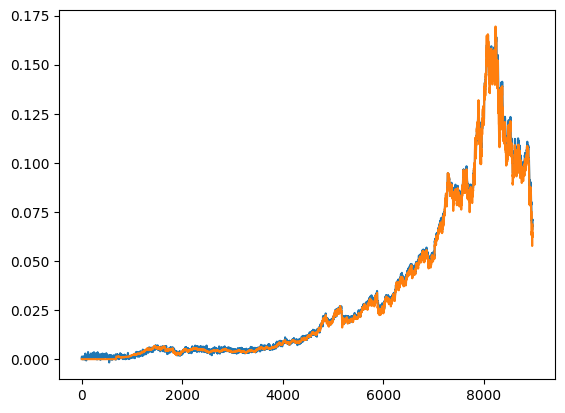

In [188]:
plt.plot(final)
plt.plot(y_train_)

71/71 [==============================] - 1s 15ms/step


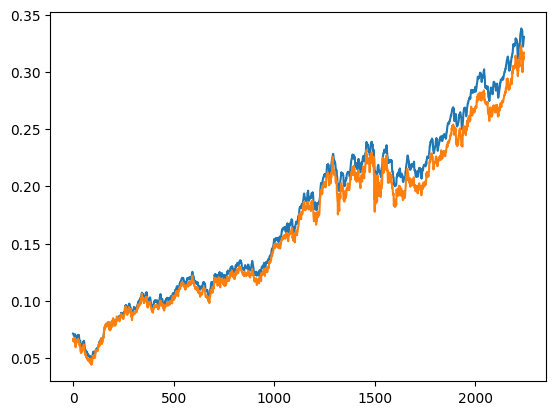

In [189]:
final_v = model.predict(X_validation)

plt.plot(final_v)
plt.plot(y_validation)

In [190]:
# fetching dataset
df = pd.read_csv("MCD.csv")
df['RSI'] = ta.rsi(df.Close, length = 15)


df['TargetNextClose'] = df['Adj Close'].shift(-1)

df.drop(['Volume', 'Close', 'Adj Close', 'Date'], axis = 1, inplace = True)
df.dropna(inplace = True)

sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df)


trainX = []
trainY = []

n_future = 1
n_past = 20

for i in range(n_past, len(df_scaled) - n_future +1):
    trainX.append(df_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
splitlimit = int(len(trainX) * 0.8)

X_train, X_test = trainX[:splitlimit], trainX[splitlimit:]
y_train, y_test = trainY[:splitlimit], trainY[splitlimit:]

splitlimit_validation = int(len(X_train) * 0.8)

X_train_, X_validation = X_train[:splitlimit_validation], X_train[splitlimit_validation:]
y_train_, y_validation = y_train[:splitlimit_validation], y_train[splitlimit_validation:]
    
lstm_input = Input(shape = (n_past, X_train_.shape[2]), name = 'lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs = Dense(1, name = 'dense_layer')(inputs)
output = Activation('linear', name = 'output')(inputs)
model = Model(inputs = lstm_input, outputs = output)
adam = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=adam, loss = 'mse', metrics=['accuracy'])
model.fit(x = X_train_, y = y_train_, batch_size = 15, epochs = 5, shuffle = True, validation_split = 0.1)

Epoch 1/5
544/544 [==============================] - 24s 38ms/step - loss: 0.0017 - accuracy: 0.1002 - val_loss: 1.3516e-05 - val_accuracy: 0.0000e+00
Epoch 2/5
544/544 [==============================] - 19s 35ms/step - loss: 1.1495e-06 - accuracy: 0.1002 - val_loss: 7.0650e-06 - val_accuracy: 0.0000e+00
Epoch 3/5
544/544 [==============================] - 20s 37ms/step - loss: 8.9401e-07 - accuracy: 0.1002 - val_loss: 5.9324e-06 - val_accuracy: 0.0000e+00
Epoch 4/5
544/544 [==============================] - 20s 37ms/step - loss: 8.1962e-07 - accuracy: 0.1002 - val_loss: 4.8492e-06 - val_accuracy: 0.0000e+00
Epoch 5/5
544/544 [==============================] - 20s 36ms/step - loss: 8.8927e-07 - accuracy: 0.1002 - val_loss: 4.4397e-06 - val_accuracy: 0.0000e+00


283/283 [==============================] - 6s 18ms/step


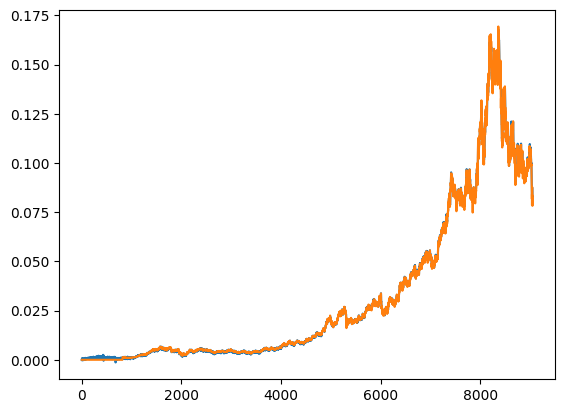

In [191]:
final = model.predict(X_train_)
plt.plot(final)
plt.plot(y_train_)

71/71 [==============================] - 1s 13ms/step


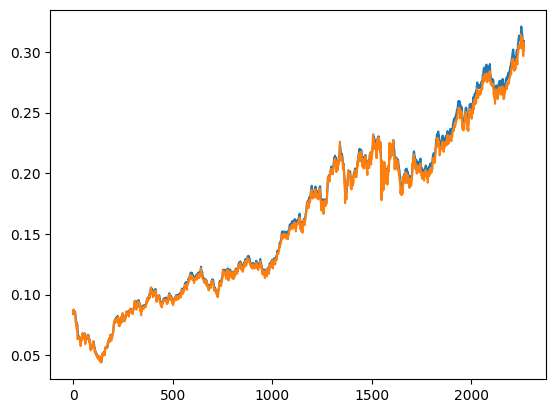

In [192]:
final_v = model.predict(X_validation)

plt.plot(final_v)
plt.plot(y_validation)

In [193]:
df = pd.read_csv("MCD.csv")
df['RSI'] = ta.rsi(df.Close, length = 15)
# df['AD'] = ta.ad(df.High, df.Low, df.Close, df.Volume)
# df['OBV'] = ta.obv(df.Close, df.Volume)
df['EMAF'] = ta.ema(df.Close, length = 20)
df['EMAM'] = ta.ema(df.Close, length = 100)
df['EMAs'] = ta.ema(df.Close, length = 150)


df['TargetNextClose'] = df['Adj Close'].shift(-1)
df.drop(['Volume', 'Close', 'Adj Close', 'Date'], axis = 1, inplace = True)
df.dropna(inplace = True)

sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df)


trainX = []
trainY = []

n_future = 1
n_past = 20

for i in range(n_past, len(df_scaled) - n_future +1):
    trainX.append(df_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
splitlimit = int(len(trainX) * 0.8)

X_train, X_test = trainX[:splitlimit], trainX[splitlimit:]
y_train, y_test = trainY[:splitlimit], trainY[splitlimit:]

splitlimit_validation = int(len(X_train) * 0.8)

X_train_, X_validation = X_train[:splitlimit_validation], X_train[splitlimit_validation:]
y_train_, y_validation = y_train[:splitlimit_validation], y_train[splitlimit_validation:]
    
lstm_input = Input(shape = (n_past, X_train_.shape[2]), name = 'lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs = Dense(1, name = 'dense_layer')(inputs)
output = Activation('linear', name = 'output')(inputs)
model = Model(inputs = lstm_input, outputs = output)
adam = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=adam, loss = 'mse', metrics=['accuracy'])
model.fit(x = X_train_, y = y_train_, batch_size = 15, epochs = 5, shuffle = True, validation_split = 0.1)

Epoch 1/5
539/539 [==============================] - 21s 33ms/step - loss: 0.0015 - accuracy: 0.0846 - val_loss: 3.6094e-05 - val_accuracy: 0.0000e+00
Epoch 2/5
539/539 [==============================] - 16s 30ms/step - loss: 1.5125e-06 - accuracy: 0.0846 - val_loss: 1.9107e-05 - val_accuracy: 0.0000e+00
Epoch 3/5
539/539 [==============================] - 17s 31ms/step - loss: 1.1761e-06 - accuracy: 0.0846 - val_loss: 1.3336e-05 - val_accuracy: 0.0000e+00
Epoch 4/5
539/539 [==============================] - 17s 31ms/step - loss: 1.0888e-06 - accuracy: 0.0846 - val_loss: 1.5539e-05 - val_accuracy: 0.0000e+00
Epoch 5/5
539/539 [==============================] - 17s 32ms/step - loss: 1.4387e-06 - accuracy: 0.0846 - val_loss: 1.0080e-05 - val_accuracy: 0.0000e+00


281/281 [==============================] - 5s 15ms/step


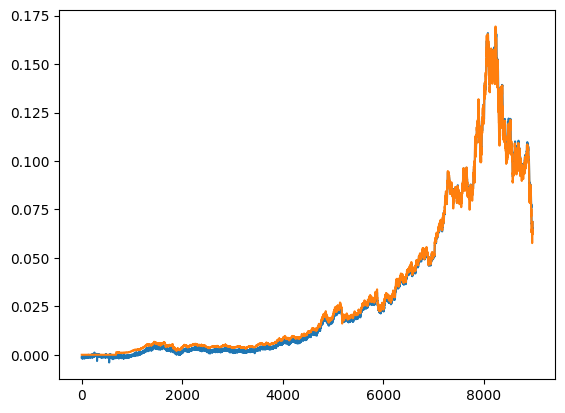

In [194]:
final = model.predict(X_train_)
plt.plot(final)
plt.plot(y_train_)

71/71 [==============================] - 1s 15ms/step


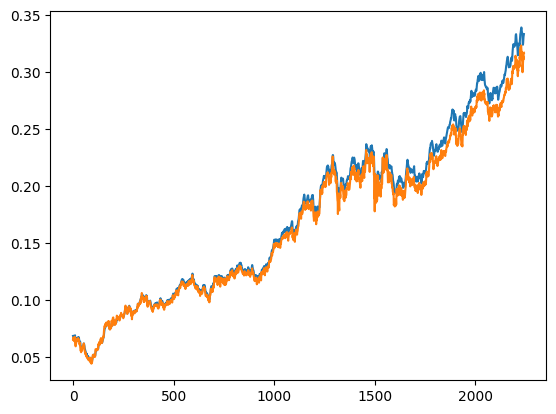

In [195]:
final_v = model.predict(X_validation)

plt.plot(final_v)
plt.plot(y_validation)

In [196]:
df = pd.read_csv("MCD.csv")
df['RSI'] = ta.rsi(df.Close, length = 15)
df['AD'] = ta.ad(df.High, df.Low, df.Close, df.Volume)
df['OBV'] = ta.obv(df.Close, df.Volume)
df['EMAF'] = ta.ema(df.Close, length = 20)
df['EMAM'] = ta.ema(df.Close, length = 100)
df['EMAs'] = ta.ema(df.Close, length = 150)

df['TargetNextClose'] = df['Adj Close'].shift(-1)
df.drop(['Volume', 'Close', 'Adj Close', 'Date'], axis = 1, inplace = True)
df.dropna(inplace = True)

sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df)


trainX = []
trainY = []

n_future = 1
n_past = 20

for i in range(n_past, len(df_scaled) - n_future +1):
    trainX.append(df_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
splitlimit = int(len(trainX) * 0.8)

X_train, X_test = trainX[:splitlimit], trainX[splitlimit:]
y_train, y_test = trainY[:splitlimit], trainY[splitlimit:]

splitlimit_validation = int(len(X_train) * 0.8)

X_train_, X_validation = X_train[:splitlimit_validation], X_train[splitlimit_validation:]
y_train_, y_validation = y_train[:splitlimit_validation], y_train[splitlimit_validation:]
    
lstm_input = Input(shape = (n_past, X_train_.shape[2]), name = 'lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs = Dense(1, name = 'dense_layer')(inputs)
output = Activation('linear', name = 'output')(inputs)
model = Model(inputs = lstm_input, outputs = output)
adam = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=adam, loss = 'mse', metrics=['accuracy'])
model.fit(x = X_train_, y = y_train_, batch_size = 15, epochs = 5, shuffle = True, validation_split = 0.1)

Epoch 1/5
539/539 [==============================] - 18s 27ms/step - loss: 0.0010 - accuracy: 0.0844 - val_loss: 1.2469e-05 - val_accuracy: 0.0000e+00
Epoch 2/5
539/539 [==============================] - 13s 25ms/step - loss: 2.3095e-06 - accuracy: 0.0846 - val_loss: 9.3422e-06 - val_accuracy: 0.0000e+00
Epoch 3/5
539/539 [==============================] - 14s 26ms/step - loss: 1.6722e-06 - accuracy: 0.0846 - val_loss: 1.1879e-05 - val_accuracy: 0.0000e+00
Epoch 4/5
539/539 [==============================] - 13s 24ms/step - loss: 2.0480e-06 - accuracy: 0.0846 - val_loss: 8.3068e-06 - val_accuracy: 0.0000e+00
Epoch 5/5
539/539 [==============================] - 13s 25ms/step - loss: 1.4174e-06 - accuracy: 0.0846 - val_loss: 4.5043e-05 - val_accuracy: 0.0000e+00


281/281 [==============================] - 4s 13ms/step


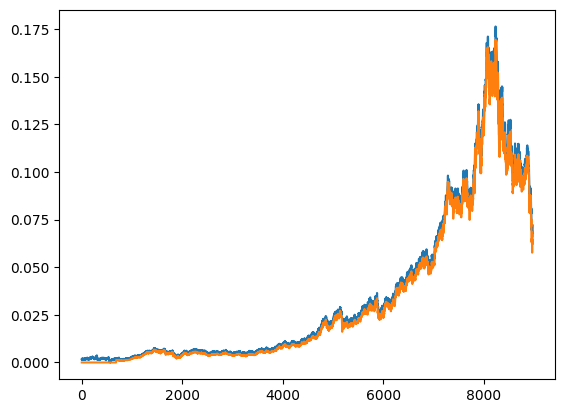

In [197]:
final = model.predict(X_train_)
plt.plot(final)
plt.plot(y_train_)

71/71 [==============================] - 1s 14ms/step


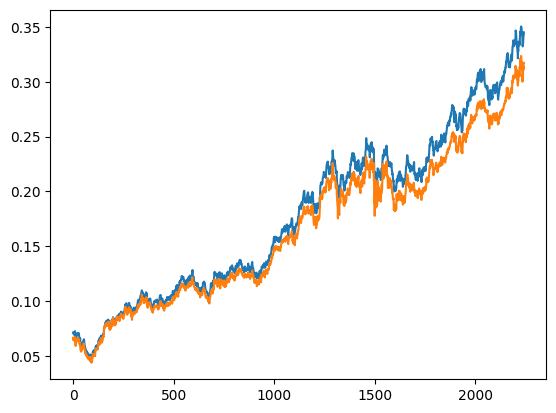

In [198]:
final_v = model.predict(X_validation)

plt.plot(final_v)
plt.plot(y_validation)

In [199]:
df = pd.read_csv("MCD.csv")
df['RSI'] = ta.rsi(df.Close, length = 15)
df['AD'] = ta.ad(df.High, df.Low, df.Close, df.Volume)
df['OBV'] = ta.obv(df.Close, df.Volume)
df['EMAF'] = ta.ema(df.Close, length = 20)
df['EMAM'] = ta.ema(df.Close, length = 100)
df['EMAs'] = ta.ema(df.Close, length = 150)
aroon = ta.aroon(df.High, df.Low)
df['AROOND_14'] = aroon['AROOND_14']
df['AROONU_14'] = aroon['AROONU_14']
df['AROONOSC_14'] = aroon['AROONOSC_14']

df['TargetNextClose'] = df['Adj Close'].shift(-1)
df.drop(['Volume', 'Close', 'Adj Close', 'Date'], axis = 1, inplace = True)
df.dropna(inplace = True)

sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df)


trainX = []
trainY = []

n_future = 1
n_past = 20

for i in range(n_past, len(df_scaled) - n_future +1):
    trainX.append(df_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
splitlimit = int(len(trainX) * 0.8)

X_train, X_test = trainX[:splitlimit], trainX[splitlimit:]
y_train, y_test = trainY[:splitlimit], trainY[splitlimit:]

splitlimit_validation = int(len(X_train) * 0.8)

X_train_, X_validation = X_train[:splitlimit_validation], X_train[splitlimit_validation:]
y_train_, y_validation = y_train[:splitlimit_validation], y_train[splitlimit_validation:]
    
lstm_input = Input(shape = (n_past, X_train_.shape[2]), name = 'lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs = Dense(1, name = 'dense_layer')(inputs)
output = Activation('linear', name = 'output')(inputs)
model = Model(inputs = lstm_input, outputs = output)
adam = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=adam, loss = 'mse', metrics=['accuracy'])
model.fit(x = X_train_, y = y_train_, batch_size = 15, epochs = 5, shuffle = True, validation_split = 0.1)

Epoch 1/5
539/539 [==============================] - 18s 28ms/step - loss: 0.0026 - accuracy: 0.0846 - val_loss: 2.5685e-05 - val_accuracy: 0.0000e+00
Epoch 2/5
539/539 [==============================] - 14s 26ms/step - loss: 1.9939e-06 - accuracy: 0.0846 - val_loss: 1.1546e-05 - val_accuracy: 0.0000e+00
Epoch 3/5
539/539 [==============================] - 14s 27ms/step - loss: 2.3124e-06 - accuracy: 0.0846 - val_loss: 6.7518e-06 - val_accuracy: 0.0000e+00
Epoch 4/5
539/539 [==============================] - 15s 27ms/step - loss: 1.9843e-06 - accuracy: 0.0846 - val_loss: 4.6636e-05 - val_accuracy: 0.0000e+00
Epoch 5/5
539/539 [==============================] - 15s 27ms/step - loss: 1.9895e-06 - accuracy: 0.0846 - val_loss: 1.4474e-05 - val_accuracy: 0.0000e+00


281/281 [==============================] - 4s 13ms/step


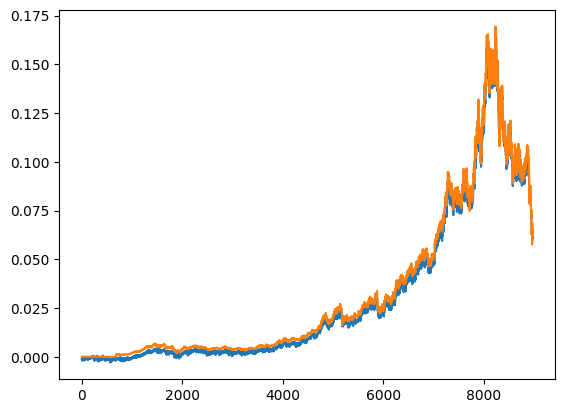

In [200]:
final = model.predict(X_train_)
plt.plot(final)
plt.plot(y_train_)

71/71 [==============================] - 1s 13ms/step


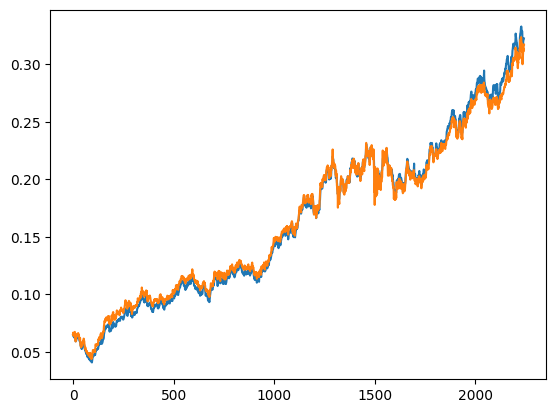

In [201]:
final_v = model.predict(X_validation)

plt.plot(final_v)
plt.plot(y_validation)

In [202]:
df = pd.read_csv("MCD.csv")
df['RSI'] = ta.rsi(df.Close, length = 15)
# df['AD'] = ta.ad(df.High, df.Low, df.Close, df.Volume)
df['OBV'] = ta.obv(df.Close, df.Volume)
df['EMAF'] = ta.ema(df.Close, length = 20)
df['EMAM'] = ta.ema(df.Close, length = 100)
df['EMAs'] = ta.ema(df.Close, length = 150)

df['TargetNextClose'] = df['Adj Close'].shift(-1)
df.drop(['Volume', 'Close', 'Adj Close', 'Date'], axis = 1, inplace = True)
df.dropna(inplace = True)

sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df)


trainX = []
trainY = []

n_future = 1
n_past = 20

for i in range(n_past, len(df_scaled) - n_future +1):
    trainX.append(df_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
splitlimit = int(len(trainX) * 0.8)

X_train, X_test = trainX[:splitlimit], trainX[splitlimit:]
y_train, y_test = trainY[:splitlimit], trainY[splitlimit:]

splitlimit_validation = int(len(X_train) * 0.8)

X_train_, X_validation = X_train[:splitlimit_validation], X_train[splitlimit_validation:]
y_train_, y_validation = y_train[:splitlimit_validation], y_train[splitlimit_validation:]
    
lstm_input = Input(shape = (n_past, X_train_.shape[2]), name = 'lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs = Dense(1, name = 'dense_layer')(inputs)
output = Activation('linear', name = 'output')(inputs)
model = Model(inputs = lstm_input, outputs = output)
adam = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=adam, loss = 'mse', metrics=['accuracy'])
model.fit(x = X_train_, y = y_train_, batch_size = 15, epochs = 5, shuffle = True, validation_split = 0.1)

Epoch 1/5
539/539 [==============================] - 20s 30ms/step - loss: 0.0017 - accuracy: 0.0846 - val_loss: 7.2313e-05 - val_accuracy: 0.0000e+00
Epoch 2/5
539/539 [==============================] - 15s 28ms/step - loss: 1.8671e-06 - accuracy: 0.0846 - val_loss: 4.2042e-05 - val_accuracy: 0.0000e+00
Epoch 3/5
539/539 [==============================] - 15s 27ms/step - loss: 1.5920e-06 - accuracy: 0.0846 - val_loss: 6.9829e-06 - val_accuracy: 0.0000e+00
Epoch 4/5
539/539 [==============================] - 15s 28ms/step - loss: 1.4692e-06 - accuracy: 0.0846 - val_loss: 7.2462e-06 - val_accuracy: 0.0000e+00
Epoch 5/5
539/539 [==============================] - 15s 28ms/step - loss: 1.3959e-06 - accuracy: 0.0846 - val_loss: 5.7056e-06 - val_accuracy: 0.0000e+00


281/281 [==============================] - 4s 14ms/step


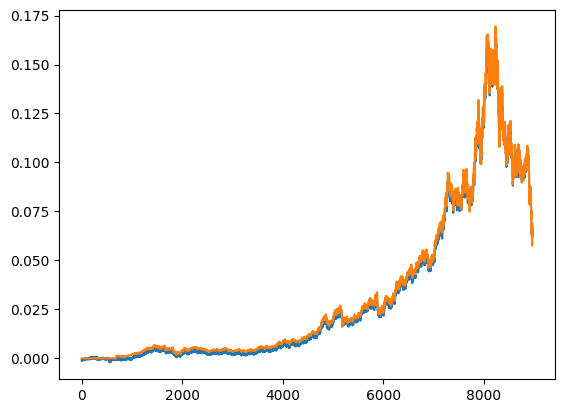

In [203]:
final = model.predict(X_train_)
plt.plot(final)
plt.plot(y_train_)

71/71 [==============================] - 1s 14ms/step


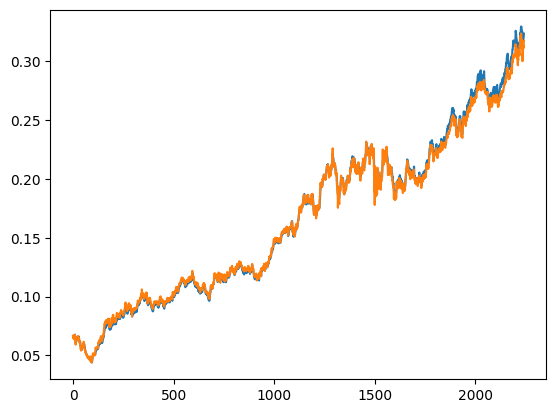

In [204]:
final_v = model.predict(X_validation)

plt.plot(final_v)
plt.plot(y_validation)

In [205]:
df = pd.read_csv("MCD.csv")
df['RSI'] = ta.rsi(df.Close, length = 15)
df['AD'] = ta.ad(df.High, df.Low, df.Close, df.Volume)
df['OBV'] = ta.obv(df.Close, df.Volume)
df['EMAF'] = ta.ema(df.Close, length = 20)
df['EMAM'] = ta.ema(df.Close, length = 100)
df['EMAs'] = ta.ema(df.Close, length = 150)
macd = ta.macd(df.Close)
df['MACD_12_26_9'] = macd['MACD_12_26_9']
df['MACDh_12_26_9'] = macd['MACDh_12_26_9']
df['MACDs_12_26_9'] = macd['MACDs_12_26_9']

df['TargetNextClose'] = df['Adj Close'].shift(-1)
df.drop(['Volume', 'Close', 'Adj Close', 'Date'], axis = 1, inplace = True)
df.dropna(inplace = True)

sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df)


trainX = []
trainY = []

n_future = 1
n_past = 20

for i in range(n_past, len(df_scaled) - n_future +1):
    trainX.append(df_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
splitlimit = int(len(trainX) * 0.8)

X_train, X_test = trainX[:splitlimit], trainX[splitlimit:]
y_train, y_test = trainY[:splitlimit], trainY[splitlimit:]

splitlimit_validation = int(len(X_train) * 0.8)

X_train_, X_validation = X_train[:splitlimit_validation], X_train[splitlimit_validation:]
y_train_, y_validation = y_train[:splitlimit_validation], y_train[splitlimit_validation:]
    
lstm_input = Input(shape = (n_past, X_train_.shape[2]), name = 'lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs = Dense(1, name = 'dense_layer')(inputs)
output = Activation('linear', name = 'output')(inputs)
model = Model(inputs = lstm_input, outputs = output)
adam = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=adam, loss = 'mse', metrics=['accuracy'])
model.fit(x = X_train_, y = y_train_, batch_size = 15, epochs = 5, shuffle = True, validation_split = 0.1)

C:\Users\jangi\AppData\Local\Temp\ipykernel_29896\2195108492.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  macd = ta.macd(df.Close)


Epoch 1/5
539/539 [==============================] - 18s 28ms/step - loss: 0.0033 - accuracy: 0.0846 - val_loss: 2.0654e-05 - val_accuracy: 0.0000e+00
Epoch 2/5
539/539 [==============================] - 15s 28ms/step - loss: 1.5154e-06 - accuracy: 0.0846 - val_loss: 4.5833e-05 - val_accuracy: 0.0000e+00
Epoch 3/5
539/539 [==============================] - 15s 28ms/step - loss: 1.9790e-06 - accuracy: 0.0846 - val_loss: 8.2721e-06 - val_accuracy: 0.0000e+00
Epoch 4/5
539/539 [==============================] - 15s 28ms/step - loss: 1.5886e-06 - accuracy: 0.0846 - val_loss: 4.4736e-06 - val_accuracy: 0.0000e+00
Epoch 5/5
539/539 [==============================] - 15s 28ms/step - loss: 2.0413e-06 - accuracy: 0.0846 - val_loss: 4.5072e-06 - val_accuracy: 0.0000e+00


281/281 [==============================] - 5s 14ms/step


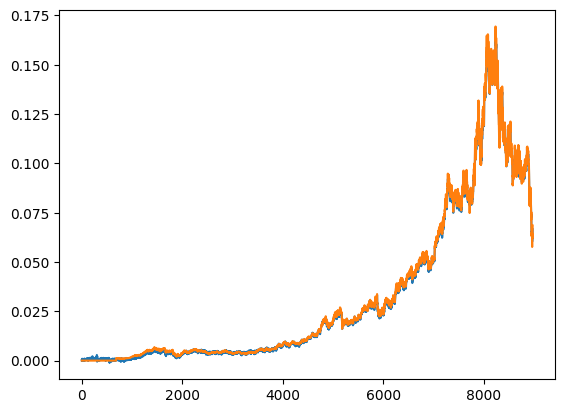

In [206]:
final = model.predict(X_train_)
plt.plot(final)
plt.plot(y_train_)

71/71 [==============================] - 1s 13ms/step


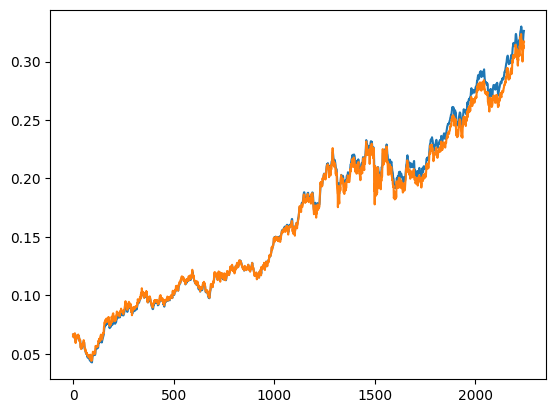

In [207]:
final_v = model.predict(X_validation)

plt.plot(final_v)
plt.plot(y_validation)

In [209]:
df = pd.read_csv("MCD.csv")
df['RSI'] = ta.rsi(df.Close, length = 15)
df['AD'] = ta.ad(df.High, df.Low, df.Close, df.Volume)
df['OBV'] = ta.obv(df.Close, df.Volume)
# df['EMAF'] = ta.ema(df.Close, length = 20)
# df['EMAM'] = ta.ema(df.Close, length = 100)
# df['EMAs'] = ta.ema(df.Close, length = 150)
# # macd = ta.macd(df.Close)
# df['MACD_12_26_9'] = macd['MACD_12_26_9']
# df['MACDh_12_26_9'] = macd['MACDh_12_26_9']
# df['MACDs_12_26_9'] = macd['MACDs_12_26_9']

df['TargetNextClose'] = df['Adj Close'].shift(-1)
df.drop(['Volume', 'Close', 'Adj Close', 'Date'], axis = 1, inplace = True)
df.dropna(inplace = True)

sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df)


trainX = []
trainY = []

n_future = 1
n_past = 20

for i in range(n_past, len(df_scaled) - n_future +1):
    trainX.append(df_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
splitlimit = int(len(trainX) * 0.8)

X_train, X_test = trainX[:splitlimit], trainX[splitlimit:]
y_train, y_test = trainY[:splitlimit], trainY[splitlimit:]

splitlimit_validation = int(len(X_train) * 0.8)

X_train_, X_validation = X_train[:splitlimit_validation], X_train[splitlimit_validation:]
y_train_, y_validation = y_train[:splitlimit_validation], y_train[splitlimit_validation:]
    
lstm_input = Input(shape = (n_past, X_train_.shape[2]), name = 'lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs = Dense(1, name = 'dense_layer')(inputs)
output = Activation('linear', name = 'output')(inputs)
model = Model(inputs = lstm_input, outputs = output)
adam = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=adam, loss = 'mse', metrics=['accuracy'])
model.fit(x = X_train_, y = y_train_, batch_size = 15, epochs = 5, shuffle = True, validation_split = 0.1)

Epoch 1/5
544/544 [==============================] - 18s 27ms/step - loss: 0.0013 - accuracy: 0.1002 - val_loss: 9.2295e-06 - val_accuracy: 0.0000e+00
Epoch 2/5
544/544 [==============================] - 14s 26ms/step - loss: 1.3658e-06 - accuracy: 0.1002 - val_loss: 7.9322e-06 - val_accuracy: 0.0000e+00
Epoch 3/5
544/544 [==============================] - 14s 25ms/step - loss: 1.0108e-06 - accuracy: 0.1002 - val_loss: 8.9259e-06 - val_accuracy: 0.0000e+00
Epoch 4/5
544/544 [==============================] - 14s 26ms/step - loss: 1.1542e-06 - accuracy: 0.1002 - val_loss: 4.4328e-06 - val_accuracy: 0.0000e+00
Epoch 5/5
544/544 [==============================] - 14s 25ms/step - loss: 1.7813e-06 - accuracy: 0.1002 - val_loss: 4.9771e-06 - val_accuracy: 0.0000e+00


283/283 [==============================] - 4s 13ms/step


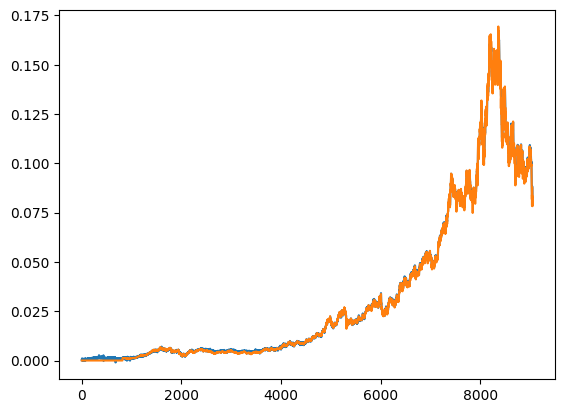

In [210]:
final = model.predict(X_train_)
plt.plot(final)
plt.plot(y_train_)

71/71 [==============================] - 2s 14ms/step


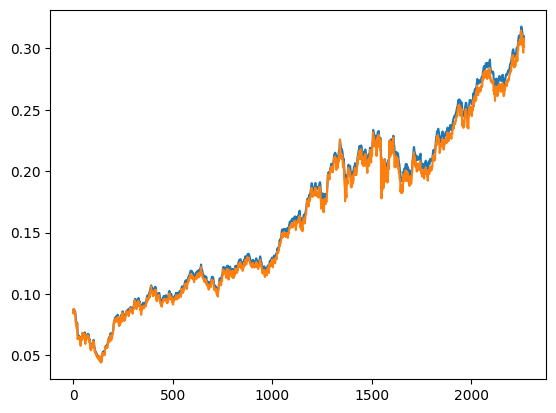

In [211]:
final_v = model.predict(X_validation)

plt.plot(final_v)
plt.plot(y_validation)

In [212]:
df = pd.read_csv("MCD.csv")
df['RSI'] = ta.rsi(df.Close, length = 15)
df['AD'] = ta.ad(df.High, df.Low, df.Close, df.Volume)
df['OBV'] = ta.obv(df.Close, df.Volume)
# df['EMAF'] = ta.ema(df.Close, length = 20)
# df['EMAM'] = ta.ema(df.Close, length = 100)
# df['EMAs'] = ta.ema(df.Close, length = 150)
# # macd = ta.macd(df.Close)
# df['MACD_12_26_9'] = macd['MACD_12_26_9']
# df['MACDh_12_26_9'] = macd['MACDh_12_26_9']
# df['MACDs_12_26_9'] = macd['MACDs_12_26_9']
aroon = ta.aroon(df.High, df.Low)
df['AROOND_14'] = aroon['AROOND_14']
df['AROONU_14'] = aroon['AROONU_14']
df['AROONOSC_14'] = aroon['AROONOSC_14']

df['TargetNextClose'] = df['Adj Close'].shift(-1)
df.drop(['Volume', 'Close', 'Adj Close', 'Date'], axis = 1, inplace = True)
df.dropna(inplace = True)

sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df)


trainX = []
trainY = []

n_future = 1
n_past = 20

for i in range(n_past, len(df_scaled) - n_future +1):
    trainX.append(df_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
splitlimit = int(len(trainX) * 0.8)

X_train, X_test = trainX[:splitlimit], trainX[splitlimit:]
y_train, y_test = trainY[:splitlimit], trainY[splitlimit:]

splitlimit_validation = int(len(X_train) * 0.8)

X_train_, X_validation = X_train[:splitlimit_validation], X_train[splitlimit_validation:]
y_train_, y_validation = y_train[:splitlimit_validation], y_train[splitlimit_validation:]
    
lstm_input = Input(shape = (n_past, X_train_.shape[2]), name = 'lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs = Dense(1, name = 'dense_layer')(inputs)
output = Activation('linear', name = 'output')(inputs)
model = Model(inputs = lstm_input, outputs = output)
adam = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=adam, loss = 'mse', metrics=['accuracy'])
model.fit(x = X_train_, y = y_train_, batch_size = 15, epochs = 5, shuffle = True, validation_split = 0.1)

Epoch 1/5
544/544 [==============================] - 17s 25ms/step - loss: 0.0041 - accuracy: 0.1002 - val_loss: 1.6078e-05 - val_accuracy: 0.0000e+00
Epoch 2/5
544/544 [==============================] - 14s 25ms/step - loss: 3.3816e-06 - accuracy: 0.1002 - val_loss: 1.5064e-05 - val_accuracy: 0.0000e+00
Epoch 3/5
544/544 [==============================] - 14s 25ms/step - loss: 2.6816e-06 - accuracy: 0.1002 - val_loss: 3.9887e-05 - val_accuracy: 0.0000e+00
Epoch 4/5
544/544 [==============================] - 14s 26ms/step - loss: 1.8967e-06 - accuracy: 0.1002 - val_loss: 9.3443e-06 - val_accuracy: 0.0000e+00
Epoch 5/5
544/544 [==============================] - 14s 25ms/step - loss: 2.0575e-06 - accuracy: 0.1002 - val_loss: 7.6911e-06 - val_accuracy: 0.0000e+00


283/283 [==============================] - 4s 13ms/step


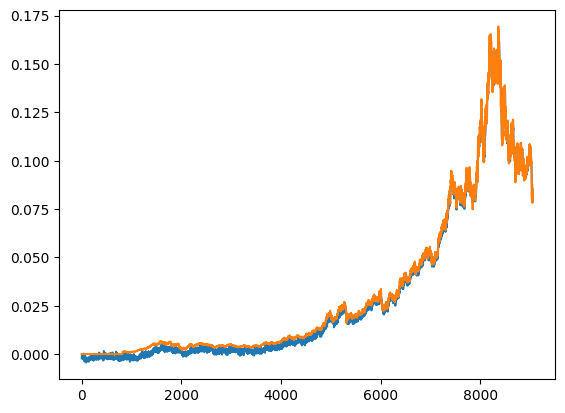

In [213]:
final = model.predict(X_train_)
plt.plot(final)
plt.plot(y_train_)

71/71 [==============================] - 2s 13ms/step


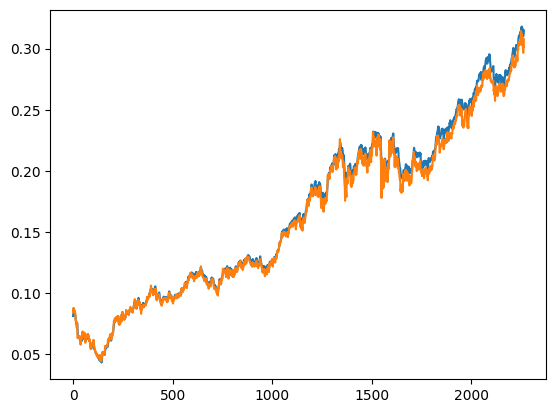

In [214]:
final_v = model.predict(X_validation)

plt.plot(final_v)
plt.plot(y_validation)

In [153]:
df = pd.read_csv("MCD.csv")
df['RSI'] = ta.rsi(df.Close, length = 15)
df['AD'] = ta.ad(df.High, df.Low, df.Close, df.Volume)
df['OBV'] = ta.obv(df.Close, df.Volume)
df['EMAF'] = ta.ema(df.Close, length = 20)
df['EMAM'] = ta.ema(df.Close, length = 100)
df['EMAs'] = ta.ema(df.Close, length = 150)

df['TargetNextClose'] = df['Adj Close'].shift(-1)
df.drop(['Volume', 'Close', 'Adj Close', 'Date'], axis = 1, inplace = True)
df.dropna(inplace = True)

sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df)

In [272]:
def nn(df_scaled, past_ = 30, lr_ = 0.02, epoch_ = 1):
    trainX = []
    trainY = []

    n_future = 1
    n_past = past_

    for i in range(past_, len(df_scaled) - n_future +1):
        trainX.append(df_scaled[i - past_:i, 0:df.shape[1]])
        trainY.append(df_scaled[i + n_future - 1:i + n_future, 0])

    trainX, trainY = np.array(trainX), np.array(trainY)
    splitlimit = int(len(trainX) * 0.8)

    X_train, X_test = trainX[:splitlimit], trainX[splitlimit:]
    y_train, y_test = trainY[:splitlimit], trainY[splitlimit:]
    
    splitlimit_validation = int(len(X_train) * 0.8)

    X_train_, X_validation = X_train[:splitlimit_validation], X_train[splitlimit_validation:]
    y_train_, y_validation = y_train[:splitlimit_validation], y_train[splitlimit_validation:]
    
    lstm_input = Input(shape = (past_, X_train_.shape[2]), name = 'lstm_input')
    inputs = LSTM(150, name = 'first_layer')(lstm_input)
    inputs = Dense(1, name = 'dense_layer')(inputs)
    output = Activation('linear', name = 'output')(inputs)
    model = Model(inputs = lstm_input, outputs = output)
    adam = optimizers.Adam(learning_rate = lr_)
    model.compile(optimizer=adam, loss = 'mse', metrics=['accuracy'])
    model.fit(x = X_train_, y = y_train_, batch_size = 15, epochs = epoch_, shuffle = True, validation_split = 0.1)
    
    pred = model.predict(X_validation)
    
    error = ((pred - y_validation)**2)
    
    return error, pred, past, epoch, lr

In [273]:
past = [15,20,30]
epoch = [5,10,20]
lr = [0.01, 0.02, 0.1]

In [274]:
error_res = error = sys.float_info.max

for p in past:
    for e in epoch:
        for l in lr:
            error, pred, past_r, epoch_r, lr_r = nn(df_scaled, epoch_ = e, lr_ = l)
            error_sum = np.sum(error)
            if(error_sum < error_res):
                error_res = error_sum
                past_res = p
                epoch_res = e
                lr_res = l
epoch_res

Epoch 1/5
538/538 [==============================] - 20s 32ms/step - loss: 0.0060 - accuracy: 0.0834 - val_loss: 3.7058e-05 - val_accuracy: 0.0000e+00
Epoch 2/5
538/538 [==============================] - 17s 31ms/step - loss: 1.8099e-06 - accuracy: 0.0834 - val_loss: 5.2678e-05 - val_accuracy: 0.0000e+00
Epoch 3/5
538/538 [==============================] - 17s 31ms/step - loss: 1.9547e-06 - accuracy: 0.0834 - val_loss: 2.6959e-05 - val_accuracy: 0.0000e+00
Epoch 4/5
538/538 [==============================] - 17s 31ms/step - loss: 1.5450e-06 - accuracy: 0.0834 - val_loss: 1.2298e-05 - val_accuracy: 0.0000e+00
Epoch 5/5
71/71 [==============================] - 2s 18ms/step
Epoch 1/5
538/538 [==============================] - 21s 33ms/step - loss: 0.0192 - accuracy: 0.0828 - val_loss: 3.9624e-04 - val_accuracy: 0.0000e+00
Epoch 2/5
538/538 [==============================] - 17s 31ms/step - loss: 3.8403e-05 - accuracy: 0.0834 - val_loss: 1.9428e-04 - val_accuracy: 0.0000e+00
Epoch 3/5
538/

10

In [275]:
past_res

15

In [276]:
epoch_res

10

In [277]:
lr_res

0.01

In [154]:
trainX = []
trainY = []

n_future = 1
n_past = 15

for i in range(n_past, len(df_scaled) - n_future +1):
    trainX.append(df_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
splitlimit = int(len(trainX) * 0.8)

X_train, X_test = trainX[:splitlimit], trainX[splitlimit:]
y_train, y_test = trainY[:splitlimit], trainY[splitlimit:]
    
splitlimit_validation = int(len(X_train) * 0.8)

X_train_, X_validation = X_train[:splitlimit_validation], X_train[splitlimit_validation:]
y_train_, y_validation = y_train[:splitlimit_validation], y_train[splitlimit_validation:]

In [165]:
lstm_input = Input(shape = (n_past, X_train.shape[2]), name = 'lstm_input')
inputs = LSTM(150, name = 'first_layer')(lstm_input)
inputs_dense = Dense(1, name = 'dense_layer')(inputs)
output = Activation('linear', name = 'output')(inputs_dense)
model = Model(inputs = lstm_input, outputs = output)
adam = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=adam, loss = 'mse', metrics=['accuracy'])
model.fit(x = X_train_, y = y_train_, batch_size = 15, epochs = 10, shuffle = True, validation_split = 0.1)
    
pred = model.predict(X_validation)
    
error = ((pred - y_validation)**2)

Epoch 1/10
539/539 [==============================] - 16s 24ms/step - loss: 0.0020 - accuracy: 0.0852 - val_loss: 2.5474e-05 - val_accuracy: 0.0000e+00
Epoch 2/10
539/539 [==============================] - 12s 23ms/step - loss: 2.7335e-06 - accuracy: 0.0852 - val_loss: 1.4221e-05 - val_accuracy: 0.0000e+00
Epoch 3/10
539/539 [==============================] - 12s 21ms/step - loss: 2.4483e-06 - accuracy: 0.0852 - val_loss: 3.3477e-05 - val_accuracy: 0.0000e+00
Epoch 4/10
539/539 [==============================] - 12s 22ms/step - loss: 1.6007e-06 - accuracy: 0.0852 - val_loss: 6.1871e-06 - val_accuracy: 0.0000e+00
Epoch 5/10
539/539 [==============================] - 12s 22ms/step - loss: 1.5638e-06 - accuracy: 0.0852 - val_loss: 5.5153e-06 - val_accuracy: 0.0000e+00
Epoch 6/10
539/539 [==============================] - 12s 22ms/step - loss: 1.4947e-06 - accuracy: 0.0852 - val_loss: 1.4699e-05 - val_accuracy: 0.0000e+00
Epoch 7/10
539/539 [==============================] - 12s 22ms/step 

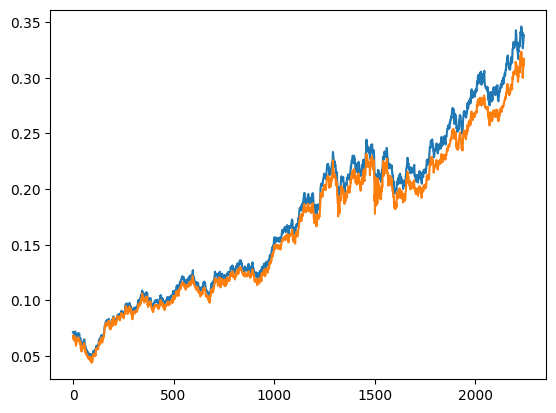

In [166]:
plt.plot(pred)
plt.plot(y_validation)

88/88 [==============================] - 1s 14ms/step


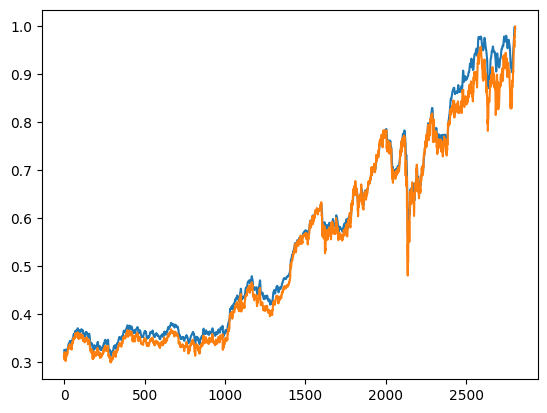

In [162]:
pred = model.predict(X_test)

plt.plot(pred)
plt.plot(y_test)

In [163]:
error_nn = ((pred - y_test)**2) * 100
np.mean(error_nn)

0.05908534893179335

In [133]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [108]:
df = pd.read_csv("MCD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1966-07-05,0.000000,0.273663,0.267490,0.269547,0.121445,388800
1,1966-07-06,0.000000,0.283951,0.267490,0.283951,0.127935,692550
2,1966-07-07,0.000000,0.291152,0.271605,0.273663,0.123300,1858950
3,1966-07-08,0.000000,0.276749,0.267490,0.276749,0.124690,1239300
4,1966-07-11,0.000000,0.283951,0.272634,0.275720,0.124227,656100
...,...,...,...,...,...,...,...
14183,2022-11-07,275.070007,278.079987,275.070007,276.410004,276.410004,3029500
14184,2022-11-08,276.859985,279.519989,276.500000,278.399994,278.399994,2628800
14185,2022-11-09,278.510010,280.250000,277.679993,277.790009,277.790009,2610800
14186,2022-11-10,281.489990,281.670013,272.579987,275.880005,275.880005,4510900


In [109]:
df = pd.read_csv("MCD.csv")
df['RSI'] = ta.rsi(df.Close, length = 15)
df['AD'] = ta.ad(df.High, df.Low, df.Close, df.Volume)
df['OBV'] = ta.obv(df.Close, df.Volume)
df['EMAF'] = ta.ema(df.Close, length = 20)
df['EMAM'] = ta.ema(df.Close, length = 100)
df['EMAs'] = ta.ema(df.Close, length = 150)

df['TargetNextClose'] = df['Adj Close'].shift(-1)
df.drop(['Volume', 'Close', 'Adj Close', 'Date'], axis = 1, inplace = True)
df.dropna(inplace = True)

# sc = MinMaxScaler(feature_range=(0,1))
# df_scaled = sc.fit_transform(df)

col_names = df.columns
col_names

Index(['Open', 'High', 'Low', 'RSI', 'AD', 'OBV', 'EMAF', 'EMAM', 'EMAs',
       'TargetNextClose'],
      dtype='object')

In [110]:
sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df)
df = pd.DataFrame(df_scaled, columns = col_names)
df

,Open,High,Low,RSI,AD,OBV,EMAF,EMAM,EMAs,TargetNextClose
0,0.000000,0.000325,0.000308,0.783383,0.121225,0.069707,0.000119,0.000000,0.000000,0.000147
1,0.000000,0.000307,0.000311,0.799417,0.121391,0.069829,0.000131,0.000006,0.000005,0.000154
2,0.000000,0.000322,0.000326,0.814950,0.121869,0.070182,0.000143,0.000012,0.000010,0.000139
3,0.000000,0.000344,0.000319,0.713917,0.121139,0.069644,0.000150,0.000017,0.000014,0.000151
4,0.000000,0.000318,0.000323,0.746501,0.121345,0.069856,0.000160,0.000023,0.000019,0.000154
...,...,...,...,...,...,...,...,...,...,...
14033,0.979076,0.978824,0.979998,0.763360,0.976256,0.985373,0.979022,0.992652,0.994774,0.992850
14034,0.977193,0.987244,0.990593,0.778379,0.976089,0.986499,0.984835,0.994490,0.996069,1.000000
14035,0.983552,0.992361,0.995747,0.794666,0.976431,0.987477,0.990808,0.996446,0.997452,0.997808
14036,0.989414,0.994955,1.000000,0.780084,0.975226,0.986506,0.995993,0.998316,0.998785,0.990945


In [111]:
df_y = df['TargetNextClose']
df_x = df.drop('TargetNextClose', axis = 1)
df_x

,Open,High,Low,RSI,AD,OBV,EMAF,EMAM,EMAs
0,0.000000,0.000325,0.000308,0.783383,0.121225,0.069707,0.000119,0.000000,0.000000
1,0.000000,0.000307,0.000311,0.799417,0.121391,0.069829,0.000131,0.000006,0.000005
2,0.000000,0.000322,0.000326,0.814950,0.121869,0.070182,0.000143,0.000012,0.000010
3,0.000000,0.000344,0.000319,0.713917,0.121139,0.069644,0.000150,0.000017,0.000014
4,0.000000,0.000318,0.000323,0.746501,0.121345,0.069856,0.000160,0.000023,0.000019
...,...,...,...,...,...,...,...,...,...
14033,0.979076,0.978824,0.979998,0.763360,0.976256,0.985373,0.979022,0.992652,0.994774
14034,0.977193,0.987244,0.990593,0.778379,0.976089,0.986499,0.984835,0.994490,0.996069
14035,0.983552,0.992361,0.995747,0.794666,0.976431,0.987477,0.990808,0.996446,0.997452
14036,0.989414,0.994955,1.000000,0.780084,0.975226,0.986506,0.995993,0.998316,0.998785


In [112]:
df_y

0        0.000147
1        0.000154
2        0.000139
3        0.000151
4        0.000154
           ...   
14033    0.992850
14034    1.000000
14035    0.997808
14036    0.990945
14037    0.974812
Name: TargetNextClose, Length: 14038, dtype: float64

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,  random_state=0)
X_train_, X_validation, y_train_, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
X_train_

,Open,High,Low,RSI,AD,OBV,EMAF,EMAM,EMAs
3027,0.003673,0.002910,0.002933,0.474194,0.021732,0.032356,0.002936,0.003480,0.003704
8351,0.134108,0.134452,0.132128,0.589958,0.639791,0.446553,0.133995,0.145567,0.150682
6175,0.028975,0.028305,0.028399,0.497554,0.457780,0.366955,0.029514,0.031276,0.031294
1668,0.006206,0.005542,0.005525,0.609648,0.120063,0.055019,0.005613,0.005567,0.005590
3769,0.005241,0.004533,0.004468,0.357152,0.082984,0.108935,0.004730,0.005189,0.005279
...,...,...,...,...,...,...,...,...,...
11812,0.340438,0.341088,0.343920,0.458691,0.955956,0.845656,0.361043,0.378357,0.381111
3498,0.004682,0.003951,0.003956,0.714474,0.033903,0.070442,0.003906,0.003758,0.003792
3257,0.003706,0.002954,0.002989,0.402842,0.015085,0.053447,0.003109,0.003376,0.003516
11834,0.339053,0.339134,0.340856,0.489396,0.945769,0.850435,0.355848,0.375668,0.379130


In [77]:
model = RandomForestRegressor(n_estimators=100, random_state=50, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'random_state': [1, 2, 30, 50]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train_, y_train_)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=9, n_estimators=500, random_state=30; total time=  19.3s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=9, n_estimators=500, random_state=30; total time=  19.3s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=9, n_estimators=500, random_state=30; total time=  19.4s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=9, n_estimators=500, random_state=30; total time=  19.7s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=9, n_estimators=500, random_state=30; total time=  19.4s
[CV] END max_depth=2, min_samples_leaf=7, min_samples_split=9, n_estimators=20, random_state=30; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=7, min_samples_split=9, n_estimators=20, random_state=30; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=7, min_samples_split=9, n_estimators=20, random_state=30; total time=   0.3

In [114]:
new_model = RandomForestRegressor(n_estimators = 1000, random_state=1, min_samples_split=2, min_samples_leaf=1, max_depth=11, bootstrap=True)

In [115]:
new_model.fit(X_train_, y_train_)

RandomForestRegressor(max_depth=11, n_estimators=1000, random_state=1)

In [116]:
predict = new_model.predict(X_validation)
print(predict)
print(predict.shape)

[0.00255887 0.0260323  0.10562902 ... 0.04882374 0.7792783  0.15007291]
(2246,)


In [117]:
predict = new_model.predict(X_test)

In [119]:
error_random = ((predict - y_test) ** 2)


In [122]:

np.mean(error_random)

1.5330352007105146e-05

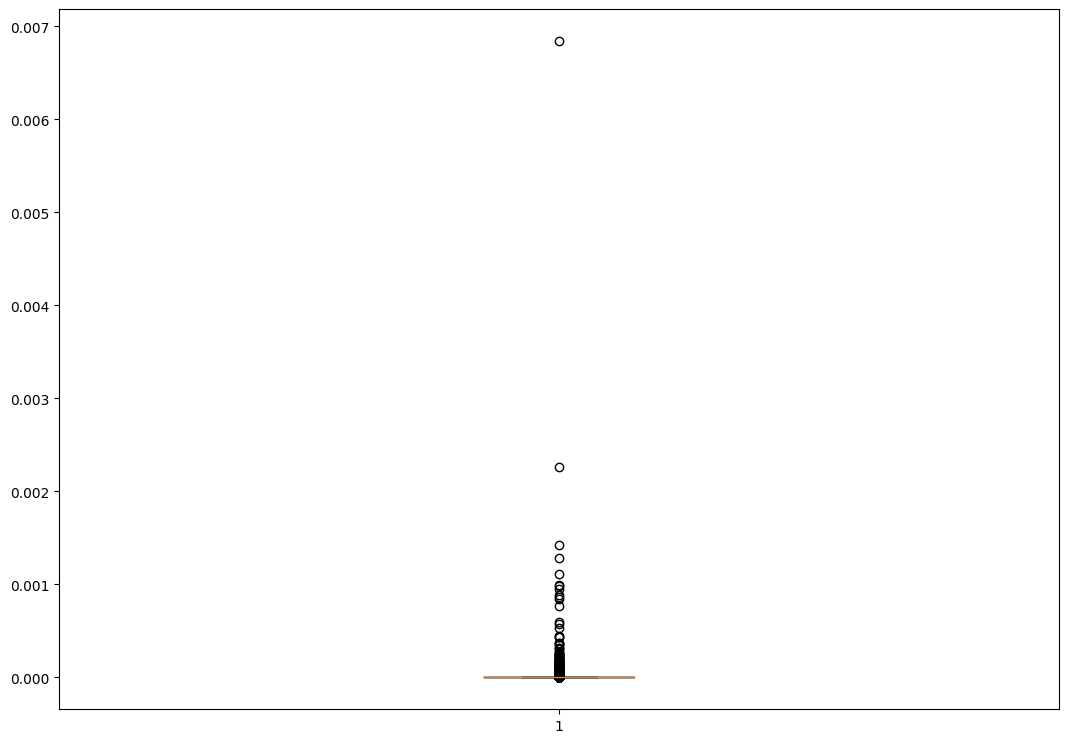

In [127]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp_random = ax.boxplot(error_random)

plt.show()

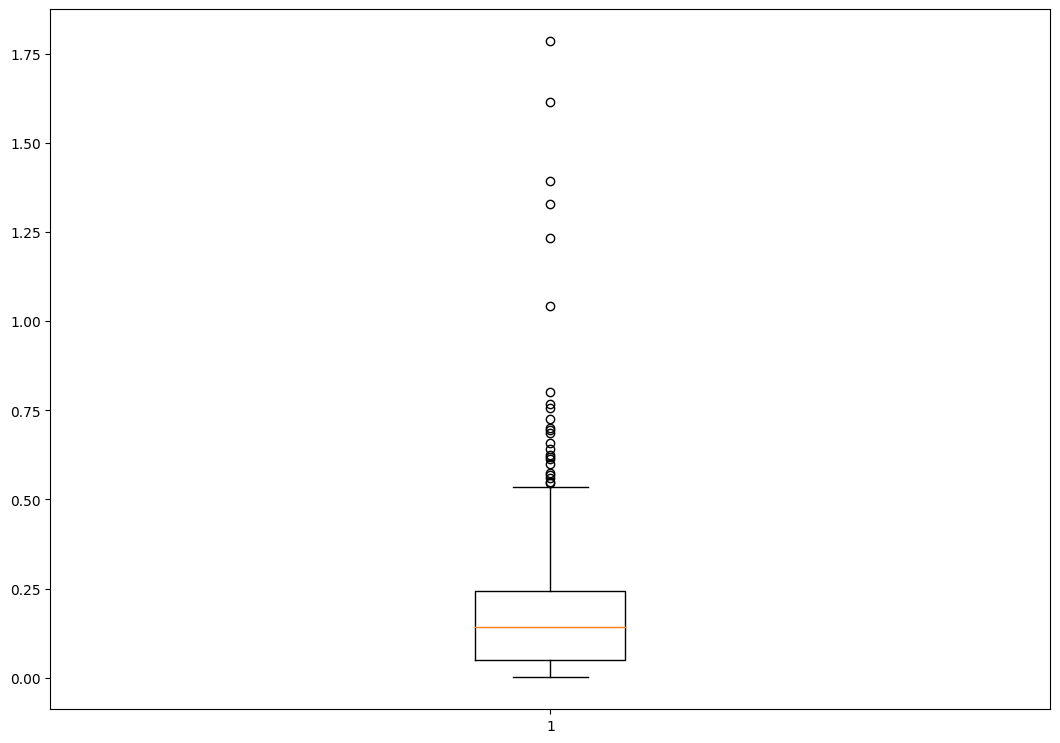

In [130]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp_nn = ax.boxplot(error_nn)
plt.show()

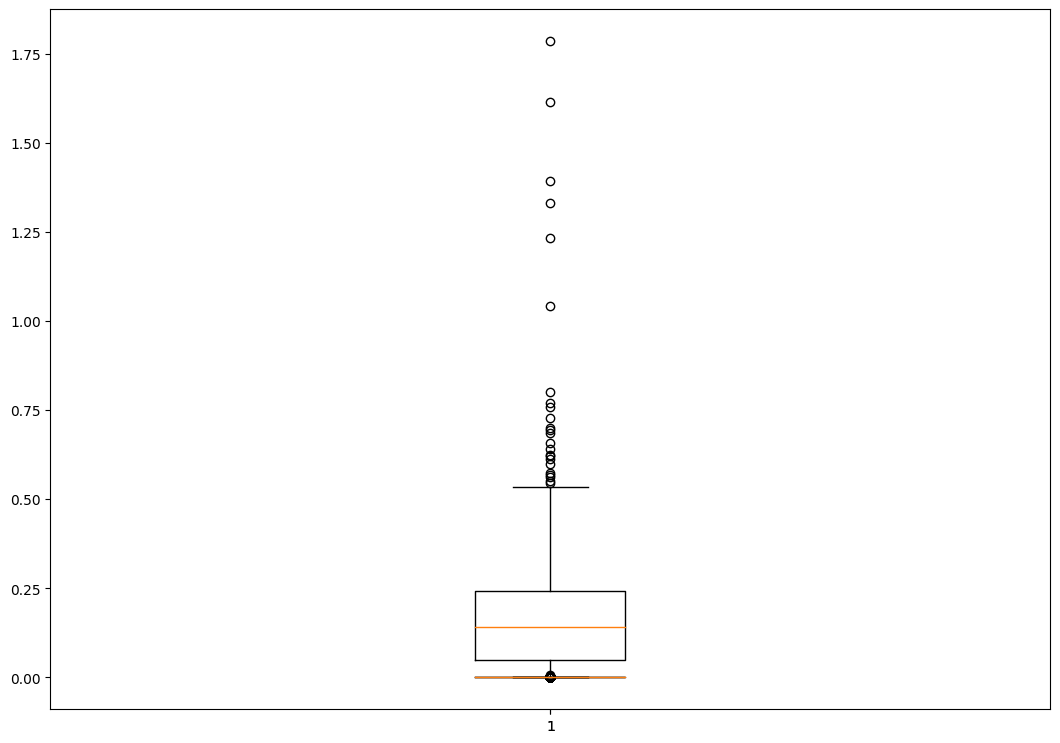

In [131]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp_random = ax.boxplot(error_random)
bp_nn = ax.boxplot(error_nn)
plt.show()